# Healthcare Insurance Expenses

## Getting Started

### Requirements
* Anaconda - On Windows OS install and add to root path. 
* Python 3
* VS Code (Optional)
* Necessary Libraries (numpy, pandas, matplotlib, seaborn, Scikit Learn)

### Import Libraries

In [196]:
#import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
# from sklearn.preprocessing import Normalizer
import warnings

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline
# from sklearn.model_selection import KFold


In [197]:
# Importing the data to be used in this project

data = pd.read_csv("insurance.csv")
data.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [198]:
# Obtaining the shape of our data

data.shape

(1338, 7)

In [199]:
# Fetching more information regarding our data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [200]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### Data cleaning

In [201]:
# Checking for null values

data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [202]:
# Checking for duplicated values

data.duplicated().sum()

1

In [203]:
# Dropping any duplicated values

data.drop_duplicates(inplace=True)

In [204]:
# Checking if there are any duplicate values

data.duplicated().sum()

0

In [205]:
# Checking our data

data.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


## Exploratory Data Analysis


### Univariate Analysis

C:\Users\Administrator\AppData\Local\Temp\ipykernel_13988\2115336833.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['age'])


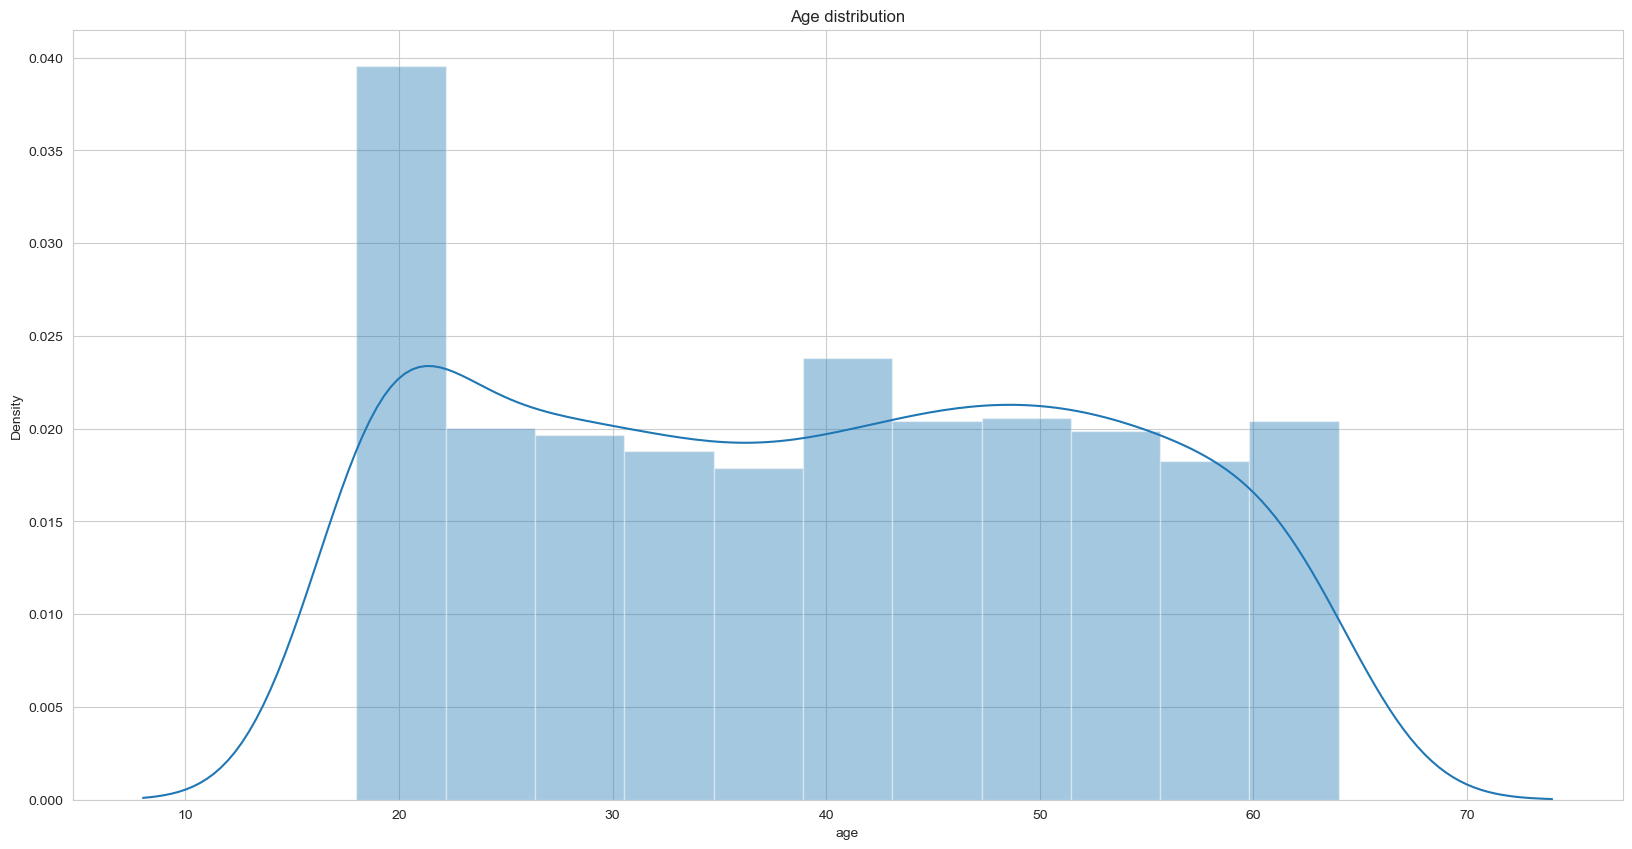

In [206]:
# Using graphs to show the distribution of age and bmi

sns.set_style("whitegrid")
plt.figure(figsize=(20,10))
sns.distplot(data['age'])

plt.title("Age distribution")
plt.show()


C:\Users\Administrator\AppData\Local\Temp\ipykernel_13988\3697768169.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.bmi)


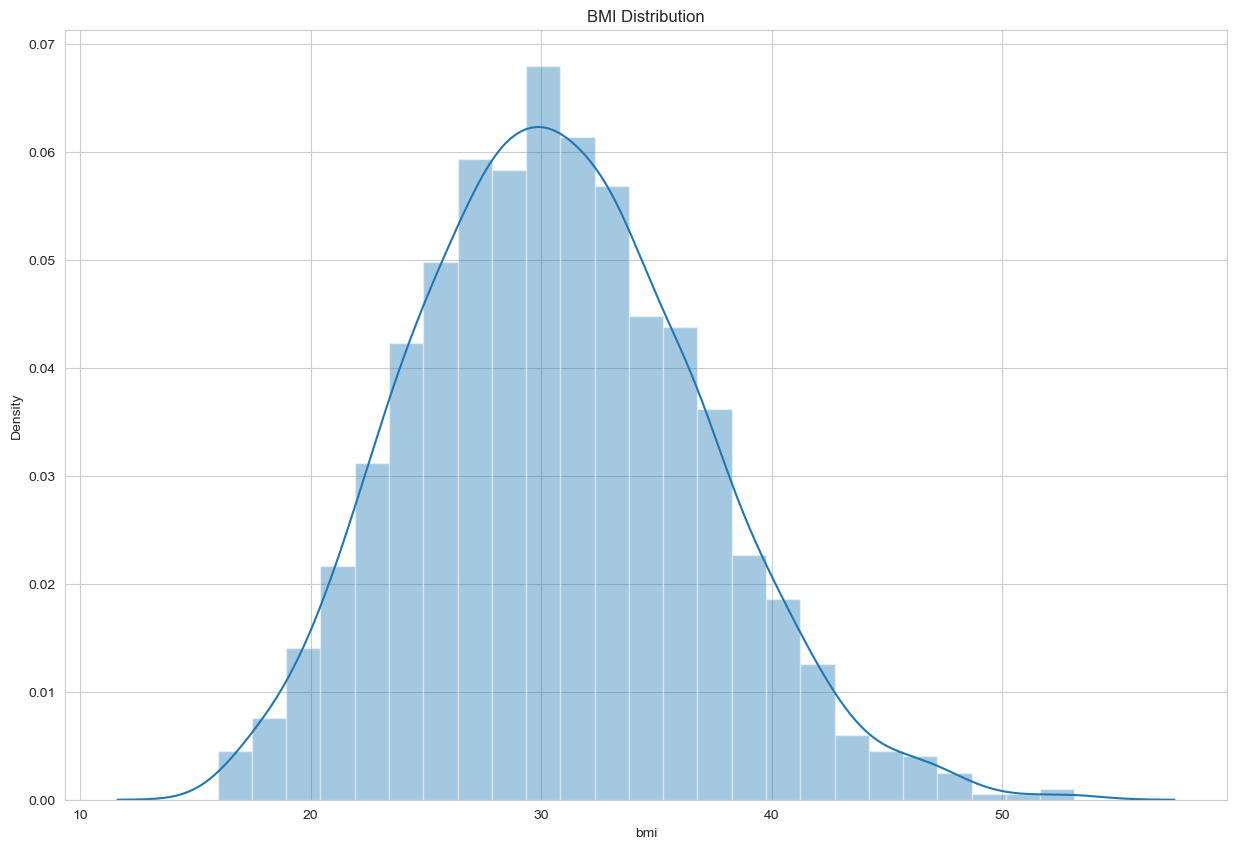

In [207]:
# Creating a distplot for bmi

sns.set_style("whitegrid")
plt.figure(figsize=(15, 10))
sns.distplot(data.bmi)
plt.title('BMI Distribution')
plt.show()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_13988\3329017872.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.charges)


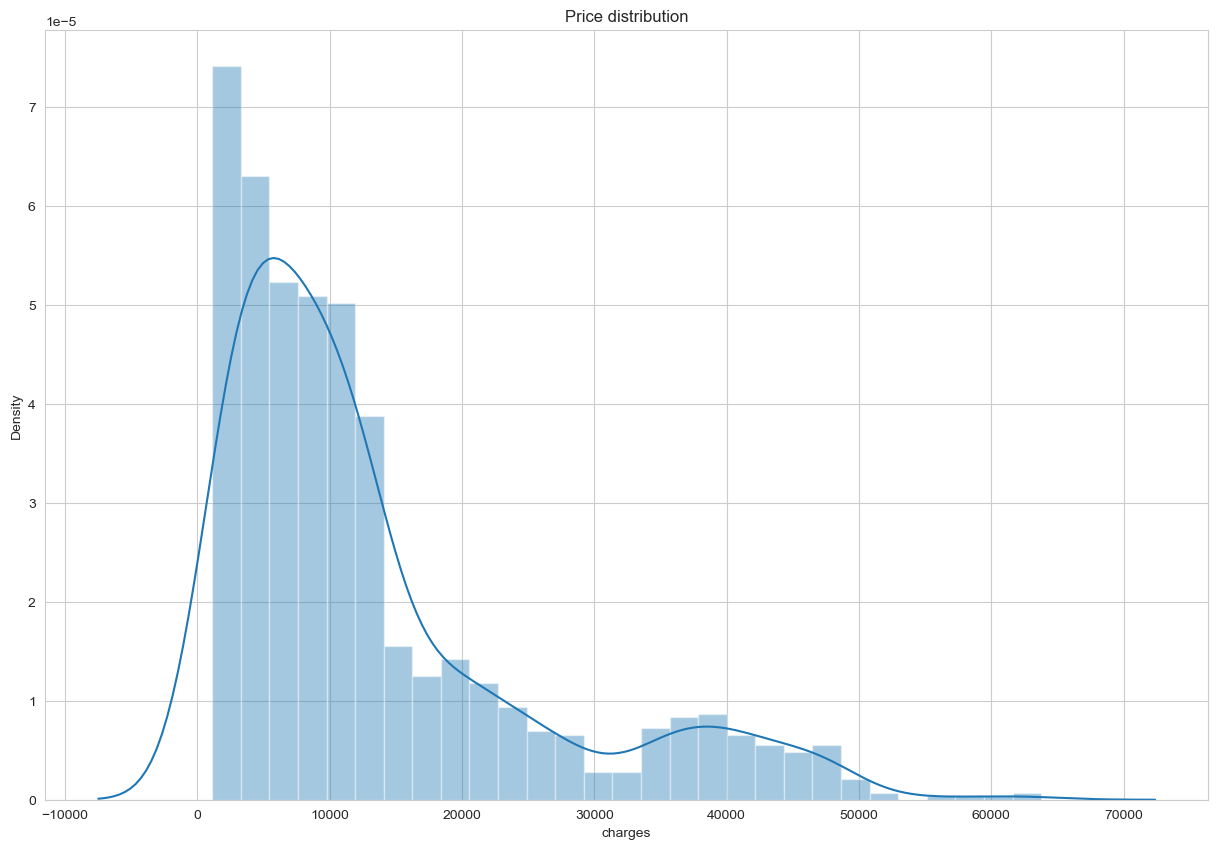

In [208]:
# Creating a distplot to see the price distribution

sns.set_style("whitegrid")
plt.figure(figsize=(15, 10))
sns.distplot(data.charges)
plt.title('Price distribution')
plt.show()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_13988\260267639.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.children)


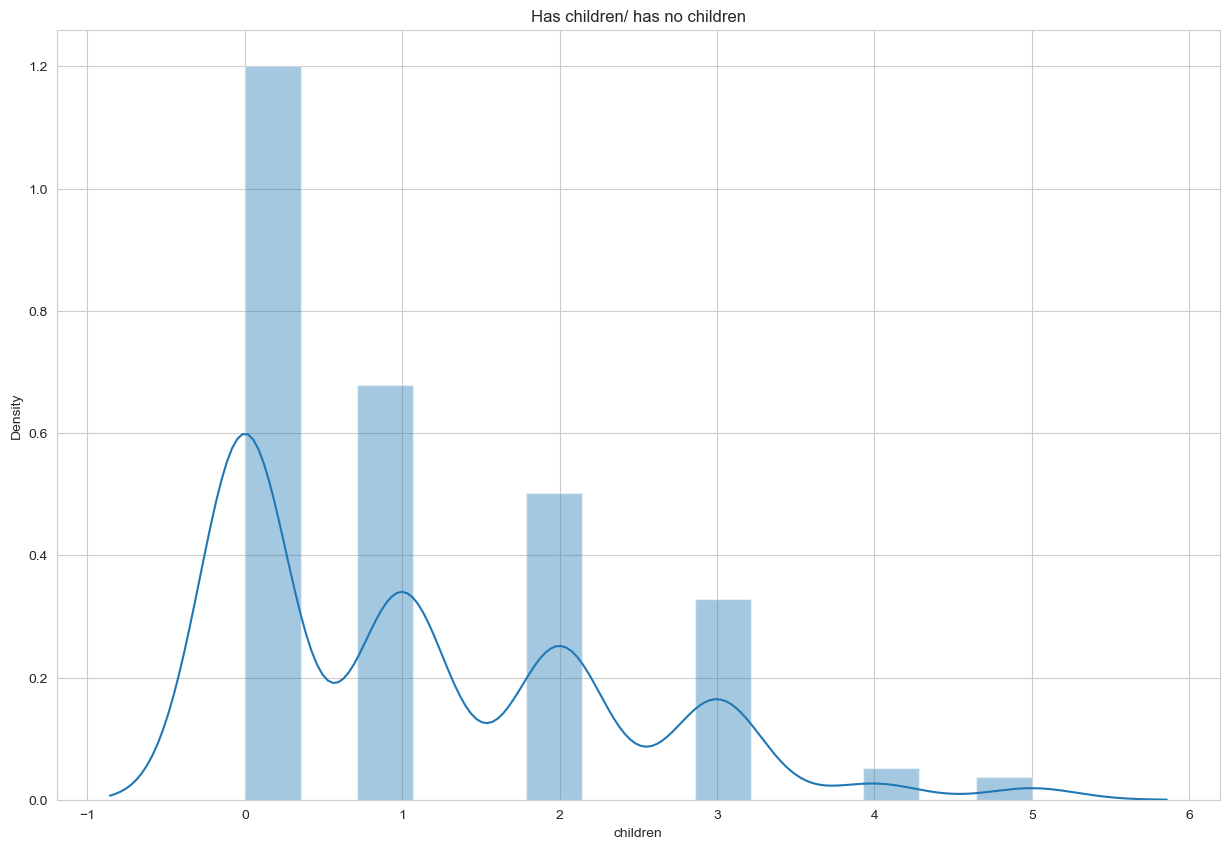

In [209]:
# Checking for the distribution of patients with children

sns.set_style("whitegrid")
plt.figure(figsize=(15, 10))
sns.distplot(data.children)
plt.title('Has children/ has no children')
plt.show()

In [210]:
data.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


#### Categorical plots

In [211]:
# Making a function for count plots and scatter plots for Categorical features

def Categorical_plot(column): 
    
    plt.figure(figsize=(20, 5)) # make figure
    plt.subplot(1,2,1)
    pd.value_counts(data[column]).plot(kind='bar')
    plt.xticks(horizontalalignment='center', fontsize=15)
    plt.xlabel(f"\n{str(column)}", fontsize=15)
    plt.ylabel("Count\n", fontsize=15)    
    plt.yticks(fontsize=15)
    plt.title(f"{str(column)} - Count\n", fontsize = 15)
    
    plt.subplot(1,2,2)
    plt.scatter(data[column], data.age)
    plt.xticks(horizontalalignment='center', fontsize=15)
    plt.xlabel(f"\n{str(column)}", fontsize=15)
    plt.yticks(fontsize = 15)
    plt.title(f"{str(column)} - Age\n", fontsize=15)
    plt.ylabel("Age\n", fontsize=15)
    
    plt.show()
    print()
    


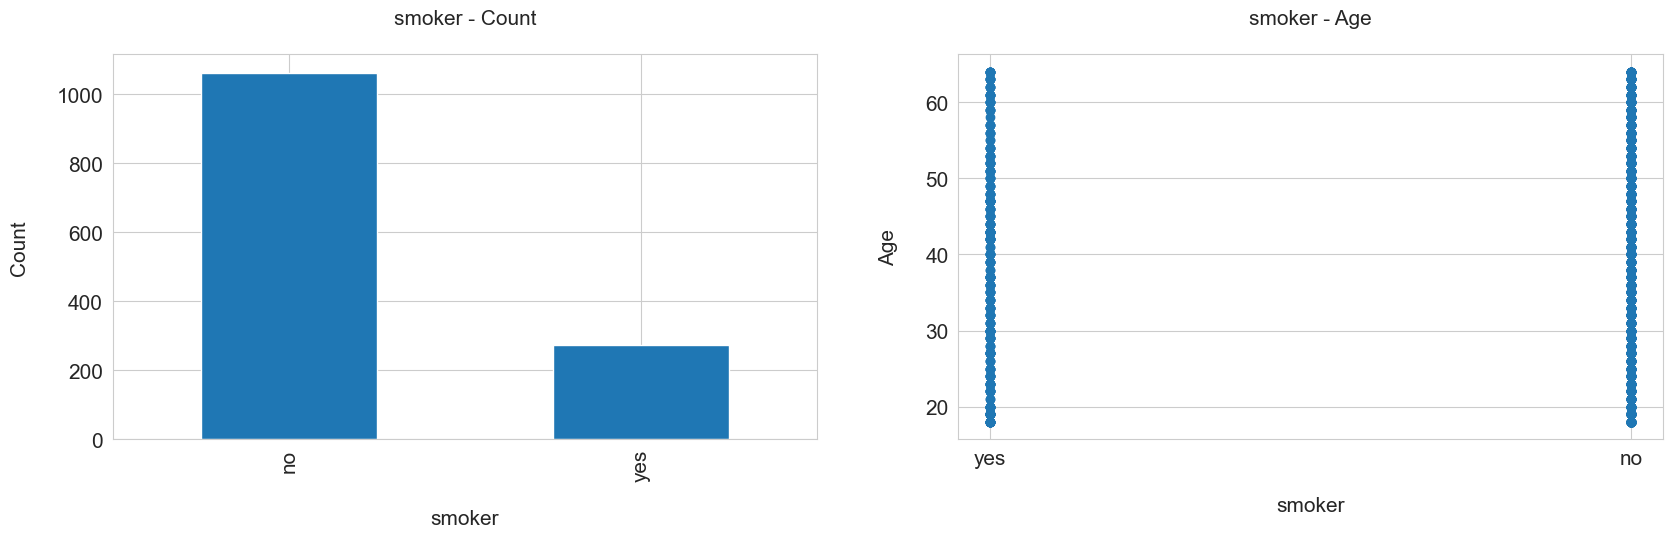

In [212]:
# Calling the created function for 'smoker'

Categorical_plot("smoker")

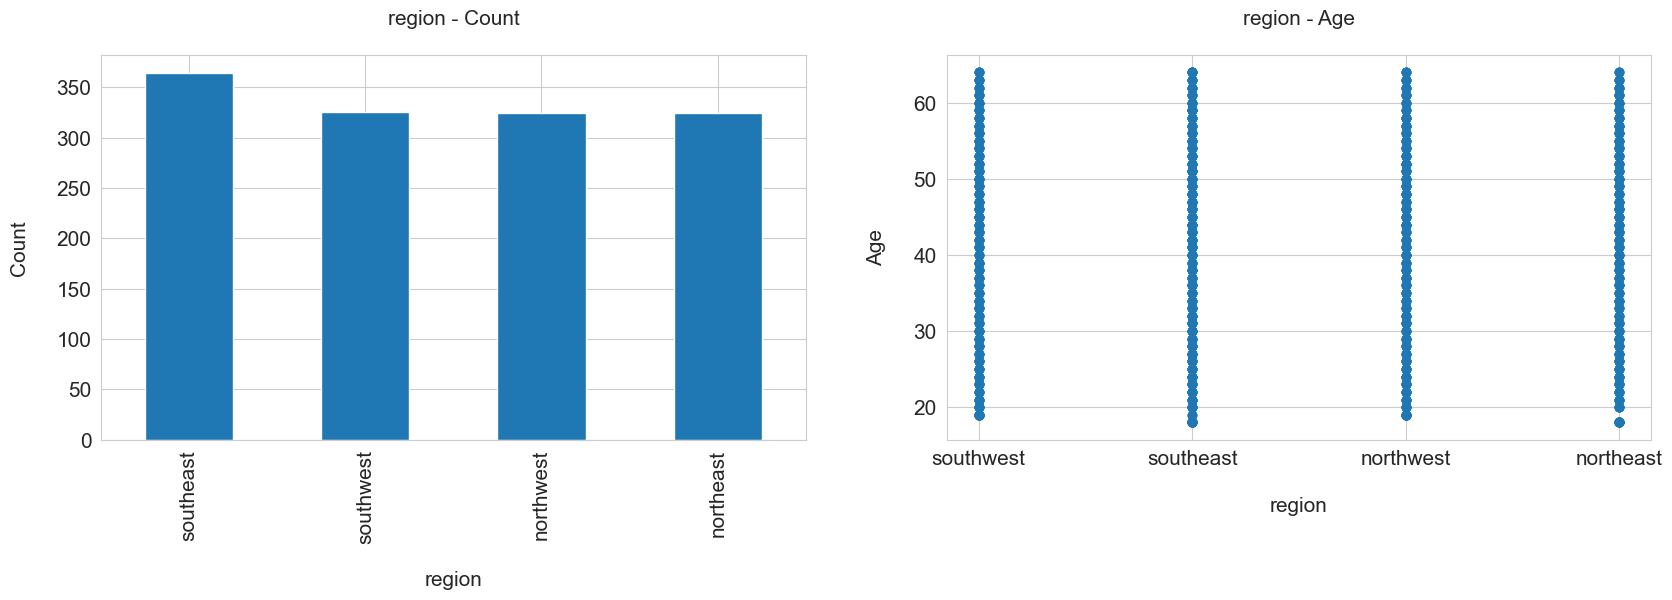

In [213]:
# Calling the created function for 'region'

Categorical_plot("region")

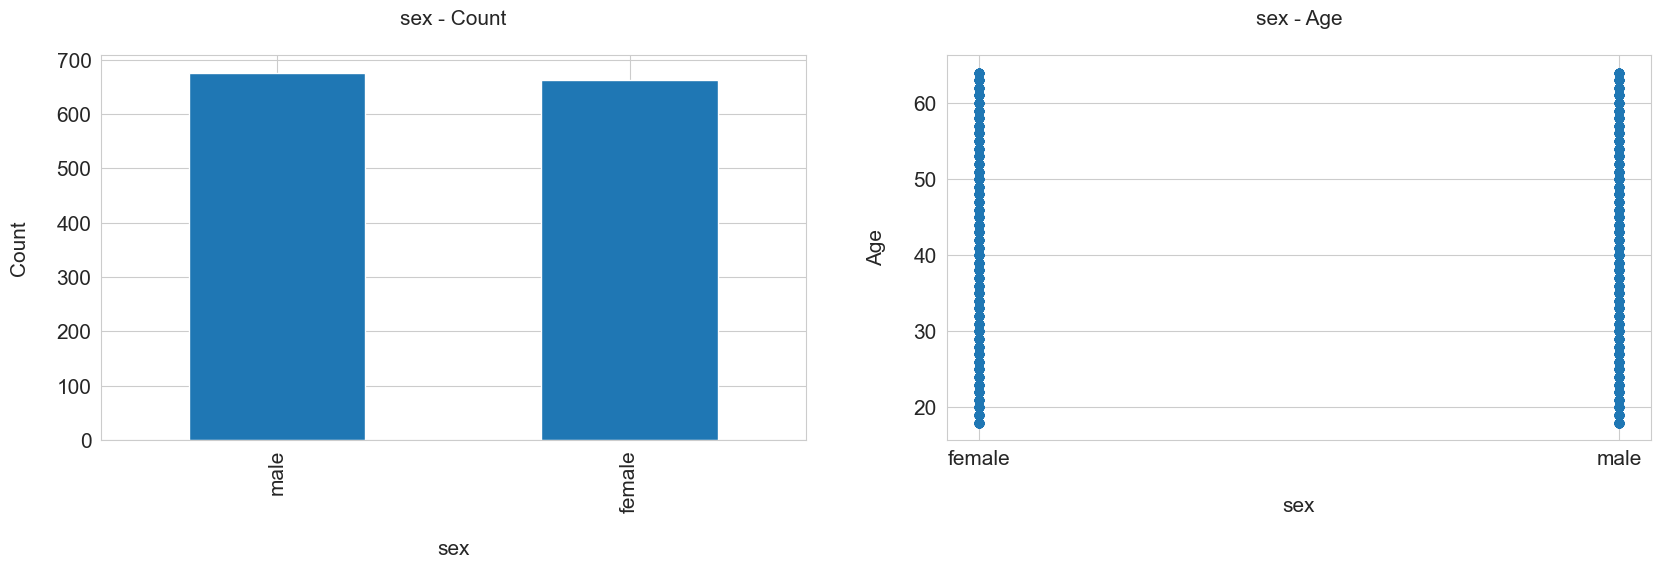

In [214]:
# Calling the created function for 'sex'

Categorical_plot("sex")

#### Numerical plots

In [215]:
# make function for box plots and scatter plots for Numerical features

def Numerical_plot(column):
    
    plt.figure(figsize=(20, 5))
    plt.subplot(1,2,1)
    plt.boxplot(data[column])
    plt.xticks(horizontalalignment='center', fontsize=15)
    plt.xlabel(f"\n{str(column)}", fontsize=15)
    plt.yticks(fontsize = 15)
    plt.title(f"\n{str(column)} Box Plot\n", fontsize=15)
    
    plt.subplot(1,2,2)
    plt.scatter(data[column], data.age)
    plt.xticks(horizontalalignment='center', fontsize=15)
    plt.xlabel(f"\n{str(column)}", fontsize=15)
    plt.yticks(fontsize=15)
    plt.title(f"\n{str(column)} - age\n", fontsize=15)
    plt.ylabel("Age\n", fontsize=15)
    plt.show()
    print()



#### Checking for outliers

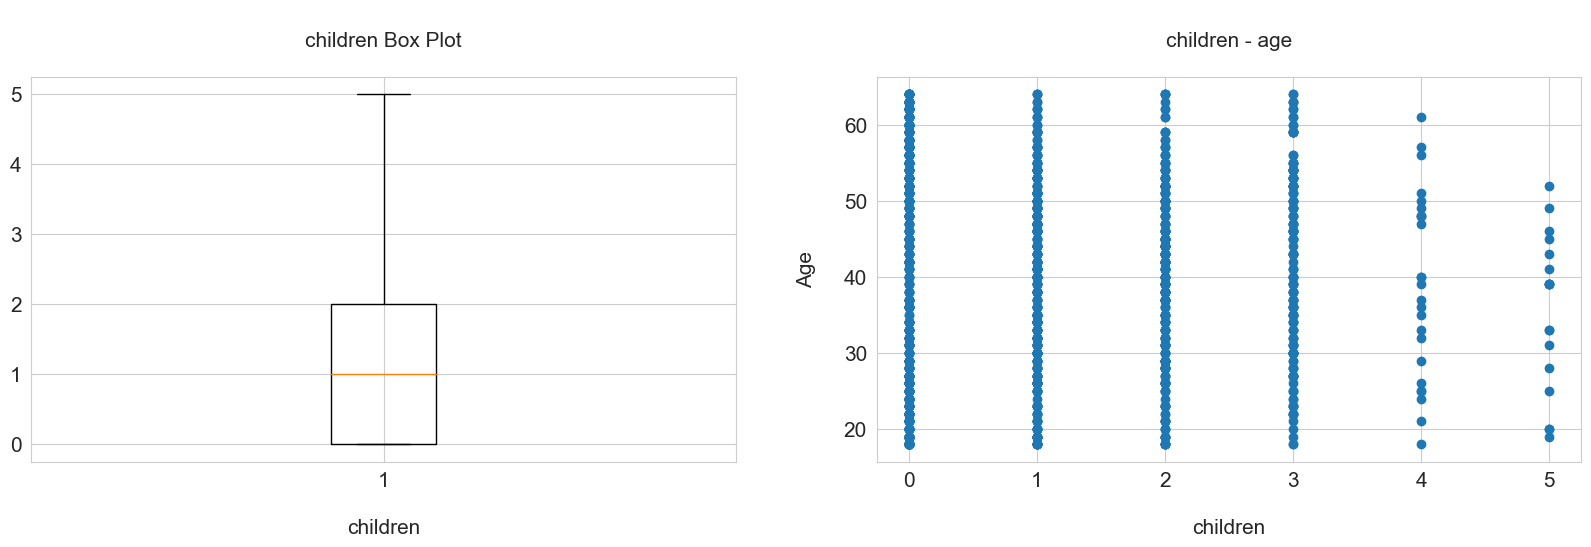

In [216]:
# # Call the numerical function for 'children'

Numerical_plot("children")

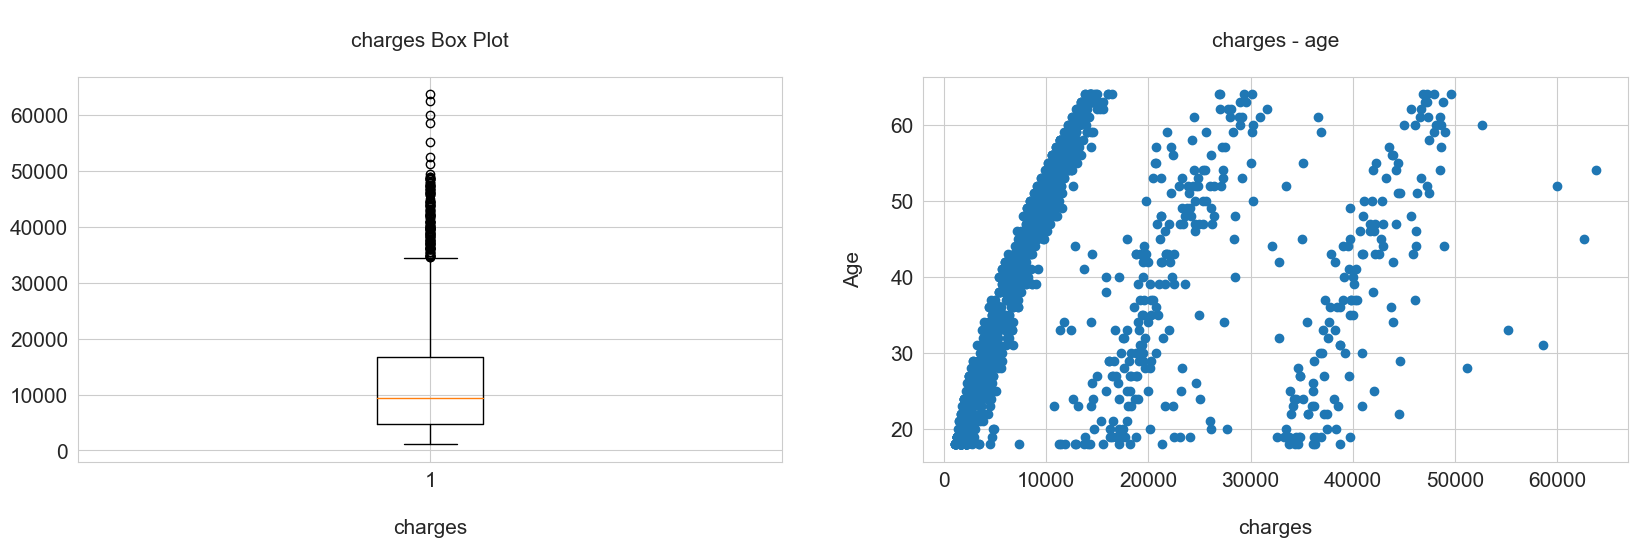

In [217]:
# Call the numerical function for 'charges'

Numerical_plot("charges")

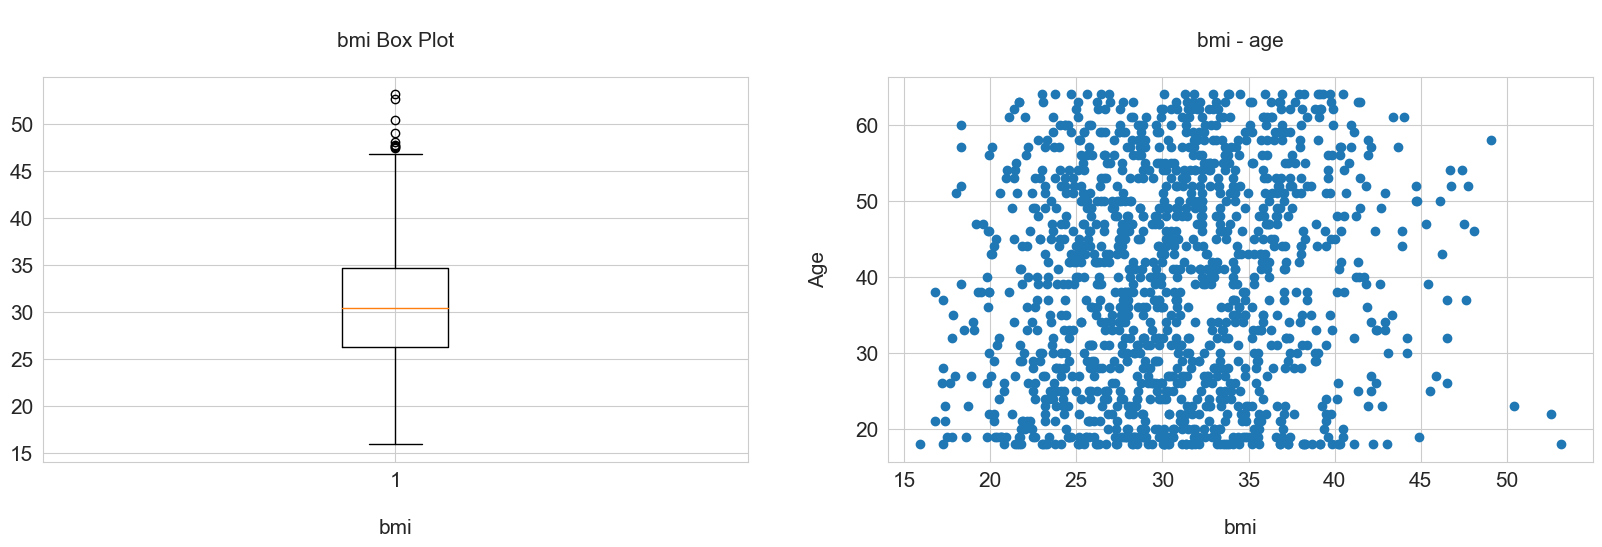

In [218]:
# Call the numerical function for 'bmi'

Numerical_plot("bmi")

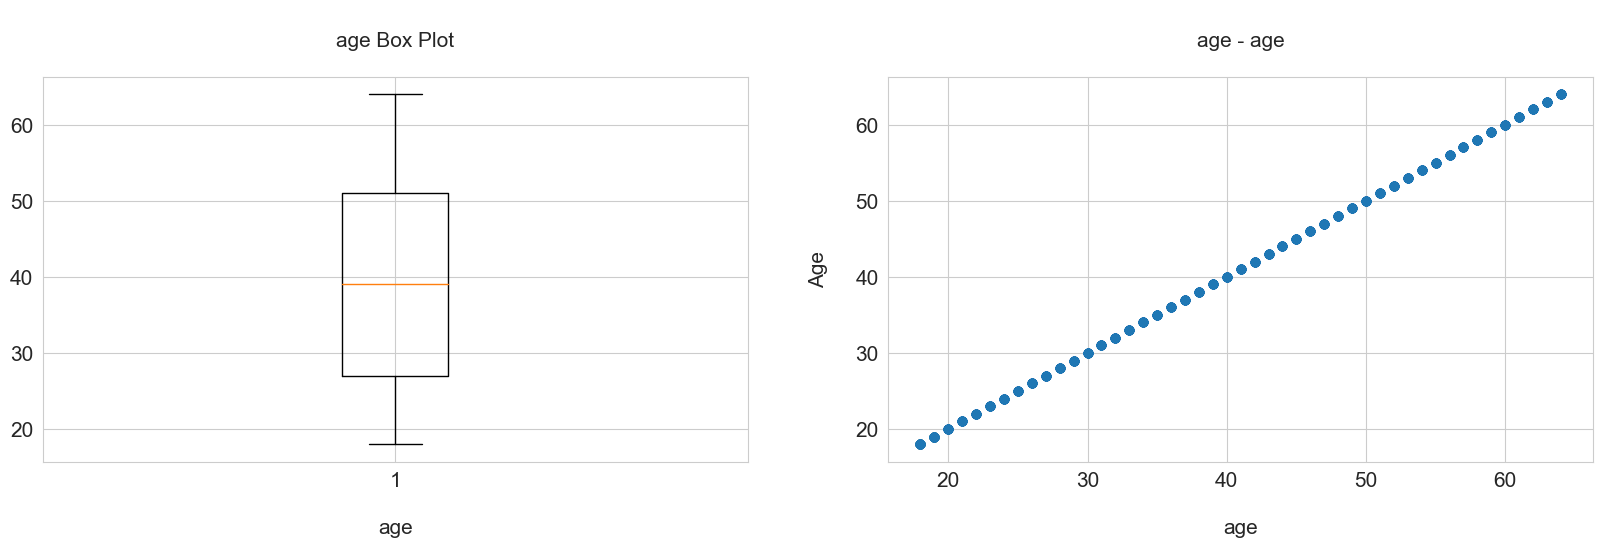

In [219]:
# Call the numerical function for 'age'

Numerical_plot("age")

### Bivariate Analysis

In [220]:
# Getting information about our dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


In [221]:
# creating a variable for all numerical columns in our data

numeric = data.select_dtypes(["int64", "float64"])
numeric[:5]

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520


<Figure size 1500x1000 with 0 Axes>

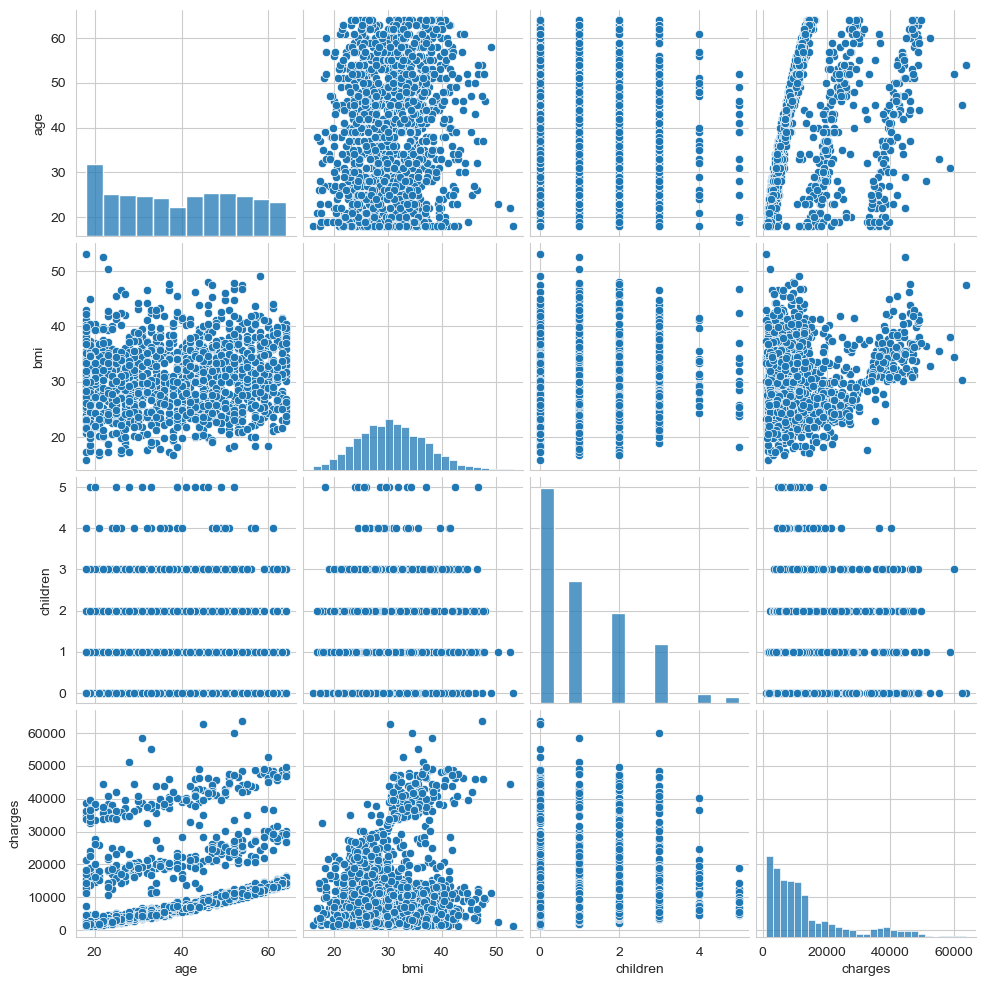

In [222]:
# Creating pairplots for the numerical columns

plt.figure(figsize=(15, 10))
sns.pairplot(numeric)
plt.show()

In [223]:
# Showing data correlation

numeric.corr()

,age,bmi,children,charges
age,1.000000,0.109344,0.041536,0.298308
bmi,0.109344,1.000000,0.012755,0.198401
children,0.041536,0.012755,1.000000,0.067389
charges,0.298308,0.198401,0.067389,1.000000


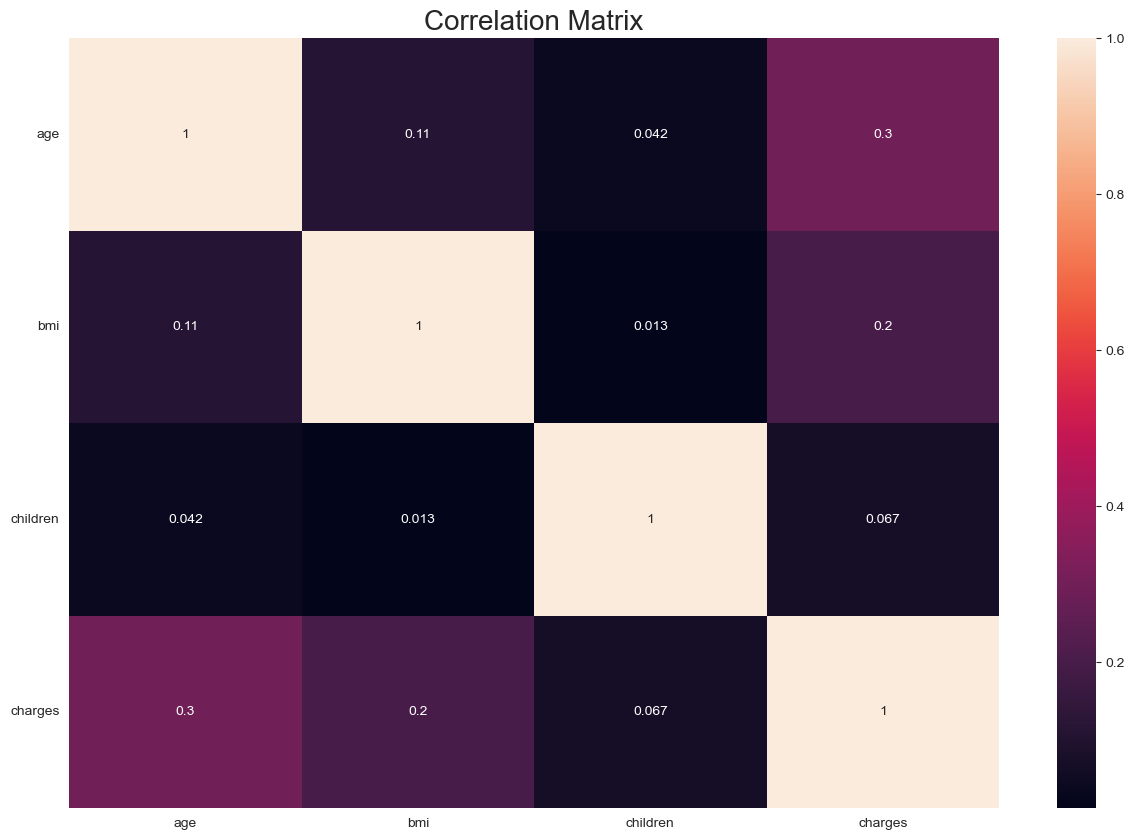

In [224]:
# Drawing the heat map for the correlation

plt.figure(figsize=(15, 10))
sns.heatmap(numeric.corr(), annot=True)
plt.title('Correlation Matrix', size = 20)
plt.yticks(rotation = 0)
plt.show()

#### Changing categorical features into numerical features

In [225]:
data.head(3)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523
2,28,male,33.00,3,no,southeast,4449.4620


In [226]:
# Checking for unique values from categorical columns

print("Sex = ", data.sex.unique(), "\n")
print("Smoker = ", data.smoker.unique(), "\n")
print("Region  = ", data.region.unique(), "\n")


Sex =  ['female' 'male'] 

Smoker =  ['yes' 'no'] 

Region  =  ['southwest' 'southeast' 'northwest' 'northeast'] 



In [227]:
# Showing the value counts in 'region

data.region.value_counts()

southeast    364
southwest    325
northwest    324
northeast    324
Name: region, dtype: int64

In [228]:
# showing the value counts in 'sex'

data.sex.value_counts()

male      675
female    662
Name: sex, dtype: int64

In [229]:
# Showing the value counts in 'smoker'

data.smoker.value_counts()

no     1063
yes     274
Name: smoker, dtype: int64

In [230]:
# Changing categorical features to numerical

data["region"].replace({'southeast':1, 'southwest':2, 'northeast':3, 'northwest':4}, inplace=True)
data["sex"].replace({'male':0, 'female':1}, inplace=True)
data["smoker"].replace({'no':0, 'yes':1}, inplace=True)

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   int64  
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   int64  
 5   region    1337 non-null   int64  
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 83.6 KB


In [231]:
# Checking the feature changes made

print("Region = ", pd.unique(data["region"]), "\n")
print("Sex = ", pd.unique(data["sex"]), "\n")
print("Smoker = ", pd.unique(data["smoker"]), "\n")



Region =  [2 1 4 3] 

Sex =  [1 0] 

Smoker =  [1 0] 



In [232]:
data.describe(include = "all")

,age,sex,bmi,children,smoker,region,charges
count,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,0.495138,30.663452,1.095737,0.204936,2.454749,13279.121487
std,14.044333,0.500163,6.100468,1.205571,0.403806,1.130521,12110.359656
min,18.000000,0.000000,15.960000,0.000000,0.000000,1.000000,1121.873900
25%,27.000000,0.000000,26.290000,0.000000,0.000000,1.000000,4746.344000
50%,39.000000,0.000000,30.400000,1.000000,0.000000,2.000000,9386.161300
75%,51.000000,1.000000,34.700000,2.000000,0.000000,3.000000,16657.717450
max,64.000000,1.000000,53.130000,5.000000,1.000000,4.000000,63770.428010


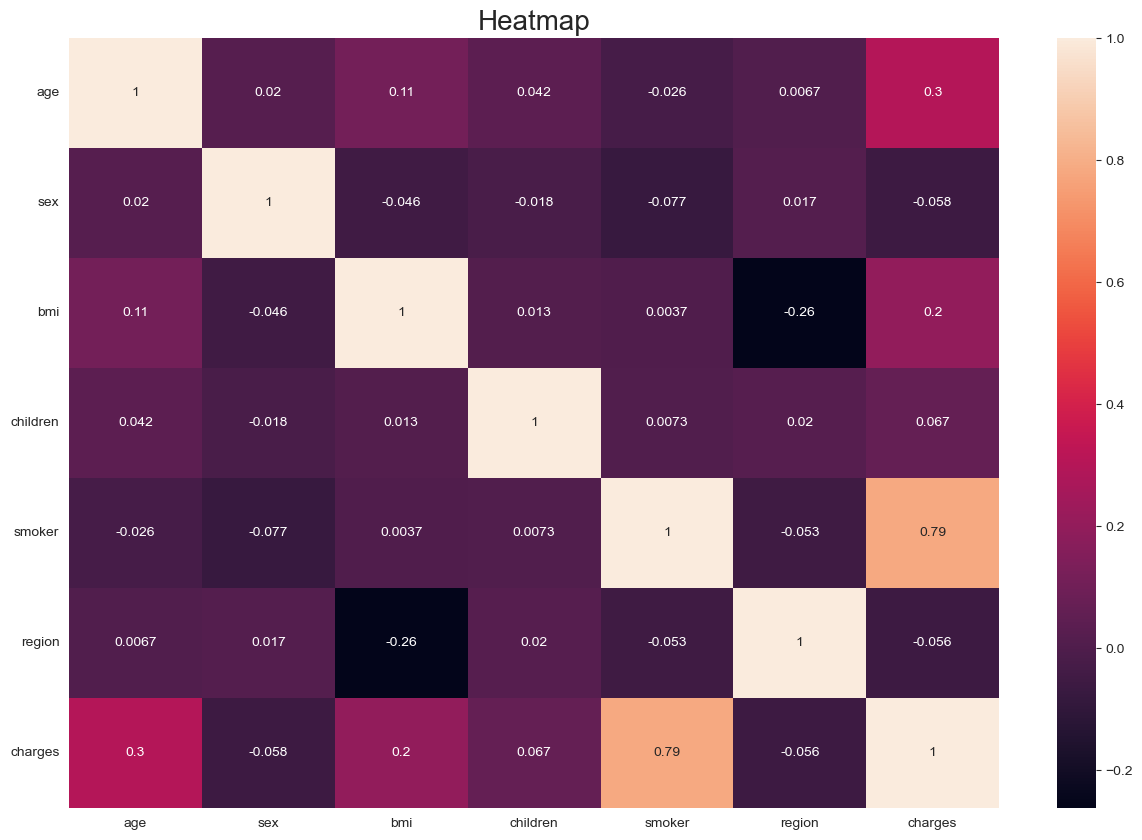

In [233]:
# Using the heatmap to show correlation for all features

plt.figure(figsize=(15, 10))
sns.heatmap(data.corr(), annot=True)
plt.yticks(rotation = 0)
plt.title("Heatmap", size = 20)
plt.show()

## Data modelling

In [234]:
# Linear regression

data.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,2,16884.92400
1,18,0,33.770,1,0,1,1725.55230
2,28,0,33.000,3,0,1,4449.46200
3,33,0,22.705,0,0,4,21984.47061
4,32,0,28.880,0,0,4,3866.85520


In [235]:
# X - Independent variable -> features variables
# Y - Dependent variable(predicted variable) -> target variable

x = pd.DataFrame(data, columns = ['age', 'bmi', 'sex', 'children', 'region', 'smoker'])
y = data['charges'].values.reshape(-1, 1)

In [236]:
# X -  80% of the data points -> Training the model
# Y - 20% of the data -> Testing the model

# splitting test and train data
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.2, random_state = 10) 

# Initialize model
model = LinearRegression()
# Train the model
model.fit(X_train, Y_train)

LinearRegression()

In [237]:
# Predicting the test data

Y_pred = model.predict(X_test)

In [238]:
model.intercept_

array([-13434.95267314])

In [239]:
model.coef_

array([[  255.43736112,   336.39075381,   283.87942879,   511.21876365,
          295.5047817 , 24183.72271603]])

#### Model evaluation

In [240]:
# Evaluations

# Mean Absolute Error
print("Mean absolute error = ", metrics.mean_absolute_error(Y_test, Y_pred))

# Mean Squared Error
print("Mean squared error : ", metrics.mean_squared_error(Y_test, Y_pred))

# Root Mean Squared Error
print("Root mean squared error : ", np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))

# R2 score
print("R2 score : ", metrics.r2_score(Y_test, Y_pred))


Mean absolute error =  4077.28218440879
Mean squared error :  36134607.852979064
Root mean squared error :  6011.206854948436
R2 score :  0.7330530469830809


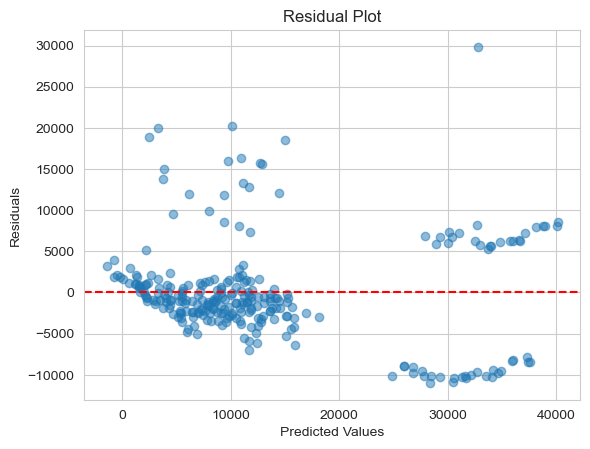

In [241]:
# Calculate the residuals
residuals = Y_test - Y_pred

# Create a scatter plot of residuals vs. predicted values
plt.scatter(Y_pred, residuals, alpha=0.5)
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid(True)
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0
plt.show()


### Decision Trees(Random Forests)

In [242]:
# Standardizing the data

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train[:5]

array([[-0.57529025, -0.78530684, -0.99719757,  1.60675578, -0.39361109,
         1.95328321],
       [ 0.35035623,  0.25421404,  1.00281031, -0.06897293, -1.27758223,
        -0.51195853],
       [-1.50093673,  0.5383067 , -0.99719757, -0.90683729, -1.27758223,
        -0.51195853],
       [-0.78890098,  1.02255556, -0.99719757, -0.06897293, -0.39361109,
        -0.51195853],
       [ 0.20794908, -0.88215661,  1.00281031, -0.06897293, -0.39361109,
        -0.51195853]])

In [243]:
from sklearn.ensemble import RandomForestRegressor

# Initialize model
rf = RandomForestRegressor(n_estimators = 100, max_depth=5, random_state = 42)

rf.fit(X_train, Y_train)

c:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(max_depth=5, random_state=42)

In [244]:
rf.pred = rf.predict(X_test)

rf.pred[:5]

array([ 5444.24082164,  4379.39687962, 16333.44689188,  7884.03609567,
       41285.09539987])

#### Model Evaluation

In [245]:
# Evaluations

# Mean Absolute Error
print("Mean absolute error = ", metrics.mean_absolute_error(Y_test, rf.pred))

# Mean Squared Error
print("Mean squared error : ", metrics.mean_squared_error(Y_test, rf.pred))

# Root Mean Squared Error
print("Root mean squared error : ", np.sqrt(metrics.mean_squared_error(Y_test, rf.pred)))

# R2 score
print("R2 score : ", metrics.r2_score(Y_test, rf.pred))

Mean absolute error =  2553.2009863964995
Mean squared error :  22251536.916374777
Root mean squared error :  4717.153476025004
R2 score :  0.8356152084467681


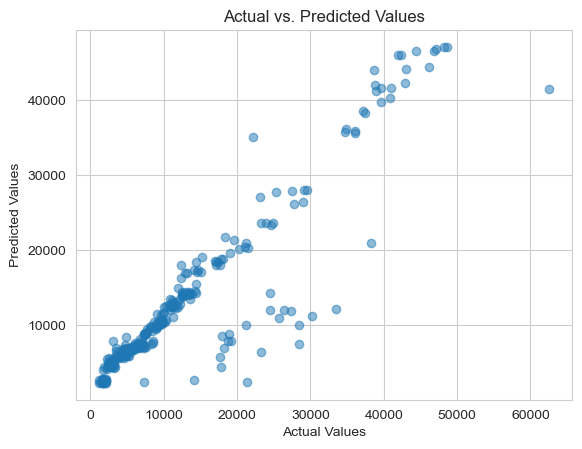

In [246]:
# Create a scatter plot of actual vs. predicted values
plt.scatter(Y_test, rf.pred, alpha=0.5)
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()


In [247]:
# import matplotlib.pyplot as plt

# feature_names = data.age, data.smoker, data.bmi, data.children, data.region, data.sex # Replace with your feature names
# feature_importance = rf.feature_importances_

# plt.figure(figsize=(10, 6))
# plt.barh(feature_names, feature_importance, color='b')
# plt.xlabel('Feature Importance')
# plt.title('Feature Importance Plot')
# plt.gca().invert_yaxis()
# plt.show()


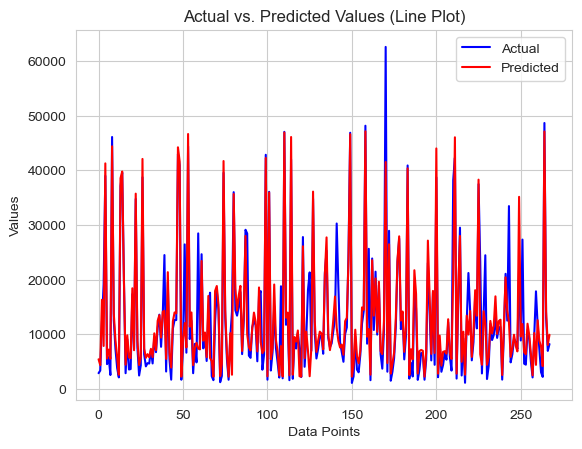

In [248]:
# Checking actual vs predicted values on a line plot

plt.plot(Y_test, label='Actual', color='blue')
plt.plot(rf.pred, label='Predicted', color='red')
plt.xlabel('Data Points')
plt.ylabel('Values')
plt.legend()
plt.title('Actual vs. Predicted Values (Line Plot)')
plt.show()


### KNeighbours

In [249]:
# Import the library

from sklearn.neighbors import KNeighborsRegressor
from math import sqrt

In [250]:
rmse_val = [] #to store rmse results for different values of k

for K in range(30):
    K = K+1
    model = KNeighborsRegressor(n_neighbors = K)
    
    model.fit(X_train, Y_train) #fit the model
    pred=model.predict(X_test) #make prediction on test set
    
    error = sqrt(metrics.mean_squared_error(Y_test, pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k = ' , K, 'is: ', error)

RMSE value for k =  1 is:  6327.940509673358
RMSE value for k =  2 is:  5718.923747667245
RMSE value for k =  3 is:  5747.05568051208
RMSE value for k =  4 is:  5550.751865962557
RMSE value for k =  5 is:  5523.080148024767
RMSE value for k =  6 is:  5479.107196486553
RMSE value for k =  7 is:  5519.702128362359
RMSE value for k =  8 is:  5525.563464169124
RMSE value for k =  9 is:  5467.873082610919
RMSE value for k =  10 is:  5403.321095295789
RMSE value for k =  11 is:  5344.876669538532
RMSE value for k =  12 is:  5334.736354501366
RMSE value for k =  13 is:  5392.524191252886
RMSE value for k =  14 is:  5380.998403126517
RMSE value for k =  15 is:  5383.046017035575
RMSE value for k =  16 is:  5381.443763213096
RMSE value for k =  17 is:  5347.166944970683
RMSE value for k =  18 is:  5303.247495628641
RMSE value for k =  19 is:  5274.381805517896
RMSE value for k =  20 is:  5277.421476220692
RMSE value for k =  21 is:  5273.68095685904
RMSE value for k =  22 is:  5302.632689488847

<Axes: >

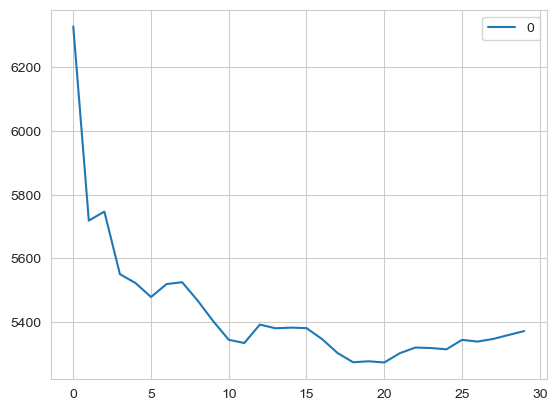

In [251]:
# Plotting the rmse values against k values

curve = pd.DataFrame(rmse_val) #elbow curve
curve.plot()

From the RMSE values found, we can see that k=1 generates the highest RMSE value. At k=21 we obtain the lowest RMSE, which shows that this is the most optimal value for k.

In [252]:
# Initiating the model

knn = KNeighborsRegressor(n_neighbors = 21)

# Training the model on our data
knn.fit(X_train, Y_train)

KNeighborsRegressor(n_neighbors=21)

In [253]:
# Make predictions using test data

knn_pred = knn.predict(X_test)

knn_pred[:5]

array([[ 4402.34016333],
       [ 3866.92201143],
       [11814.46505524],
       [11551.65311   ],
       [32874.92802   ]])

#### Model Evaluations

In [254]:
# Evaluations

# Mean Absolute Error
print("Mean absolute error = ", metrics.mean_absolute_error(Y_test, knn_pred))

# Mean Squared Error
print("Mean squared error : ", metrics.mean_squared_error(Y_test, knn_pred))

# Root Mean Squared Error
print("Root mean squared error : ", np.sqrt(metrics.mean_squared_error(Y_test, knn_pred)))

# R2 score
print("R2 score : ", metrics.r2_score(Y_test, knn_pred))

Mean absolute error =  3091.910120248579
Mean squared error :  27811710.834737673
Root mean squared error :  5273.68095685904
R2 score :  0.7945390331693117


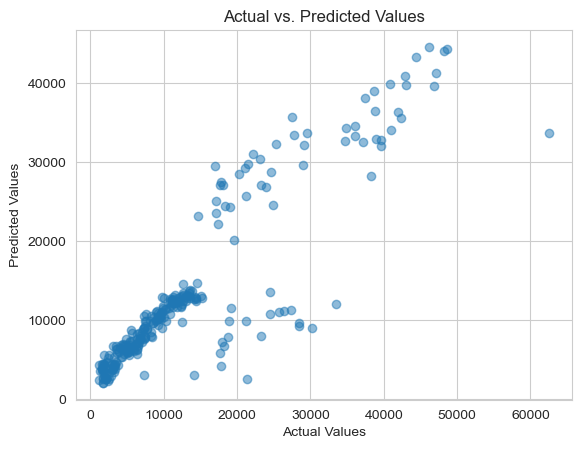

In [255]:
# import matplotlib.pyplot as plt

# Create a scatter plot of actual vs. predicted values
plt.scatter(Y_test, knn_pred, alpha=0.5)
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()


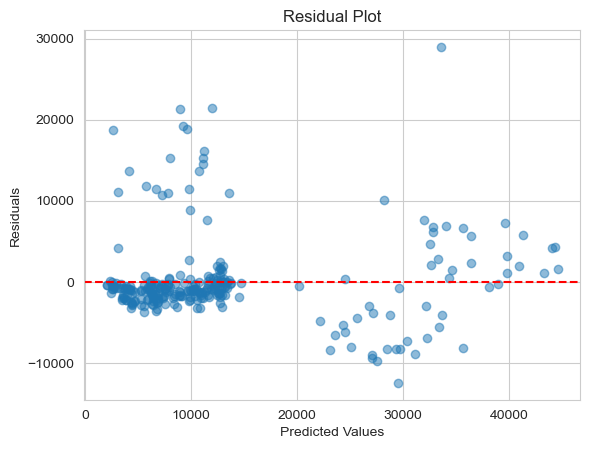

In [256]:
# Calculate the residuals
residuals = Y_test - knn_pred

# Create a scatter plot of residuals vs. predicted values
plt.scatter(knn_pred, residuals, alpha=0.5)
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid(True)
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0
plt.show()


According to the tested models, the decision trees algorithm gives the highest level of accuracy for our model with 83% accuracy. Other models can be tested for higher accuracy results and parameter tuning.

### XGBoost Model